# 12752 Data Driven Final Project
# Analyzing Fuel Oil Consumption in U.S. Households Census by Region and Division

In [171]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import copy
import sklearn
from sklearn import tree, feature_selection
from sklearn.feature_selection import SelectFromModel
from sklearn.cluster import KMeans
%matplotlib inline

In [30]:
f = open('/Users/apple/Desktop/data driven/project/dataset/oil consumption time series.csv')
t = pd.read_csv(f,sep=',', header='infer', parse_dates=[1])

In [31]:
t = t.set_index('Year')
del t.index.name

In [115]:
# Here is a part of example of the dataset
t

,Total Consumption,Northeast,Midwest,South,West,Total Households,Total Residential Buildings,Total Floorspace,Oil Price
1980,1524.12,1069.04,169.00,247.68,38.40,15.4,11.6,29.7,116.72
1981,1273.76,921.15,182.85,140.56,29.20,14.6,11.0,28.9,102.30
1982,1196.53,831.60,158.88,177.97,28.08,15.5,12.2,30.0,90.65
1984,1252.42,924.35,127.66,161.00,39.41,17.5,13.8,32.0,71.36
1987,1223.04,873.60,160.58,170.20,18.66,17.4,14.0,33.3,41.37
1990,1043.45,780.53,129.64,113.60,19.68,16.3,13.5,33.2,50.43
1993,1076.43,779.73,134.32,127.10,35.28,13.8,11.6,29.8,33.59
1997,1062.79,830.66,108.90,97.73,25.50,13.2,11.0,23.2,31.71
2001,754.47,601.37,62.53,74.52,16.05,11.2,9.4,26.0,35.81


In [33]:
t.index.tolist()

[1980, 1981, 1982, 1984, 1987, 1990, 1993, 1997, 2001]

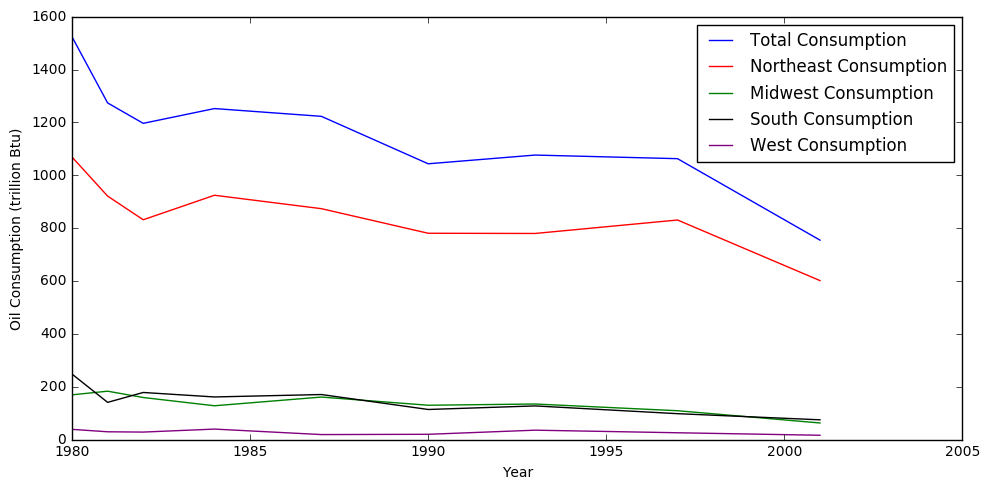

In [112]:
fig = plt.figure(figsize=(10,5))

plt.plot(t['Total Consumption'],label='Total Consumption')
plt.plot(t['Northeast'],'r',label='Northeast Consumption')
plt.plot(t['Midwest'],'g',label='Midwest Consumption')
plt.plot(t['South'],'black',label='South Consumption')
plt.plot(t['West'],'purple',label='West Consumption')

# plt.title('Oil Consumption Census by Region and Division,1980-2001')
plt.xlabel('Year')
plt.ylabel('Oil Consumption (trillion Btu)')
            
fig.tight_layout()
plt.legend()
plt.show()

In [35]:
Consumption=[]
for i in range (9):
    val=float(t['Total Consumption'].values[i])
    Consumption.append(val)

In [36]:
Northeast=[]
for i in range (9):
    val=float(t['Northeast'].values[i])
    Northeast.append(val)
    
Midwest=[]
for i in range (9):
    val=float(t['Midwest'].values[i])
    Midwest.append(val)
    
South=[]
for i in range (9):
    val=float(t['South'].values[i])
    South.append(val)
    
West=[]
for i in range (9):
    val=float(t['West'].values[i])
    West.append(val)

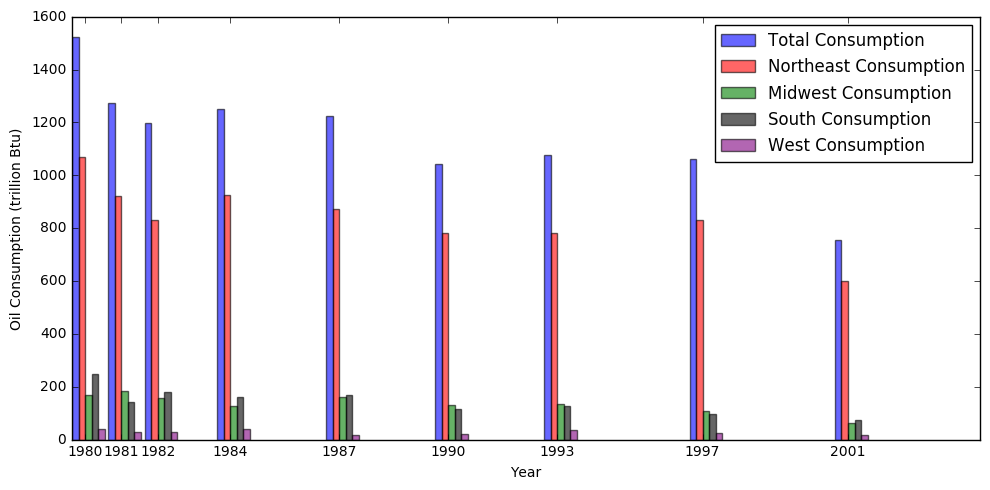

In [113]:
fig = plt.figure(figsize=(10,5))
x = np.array(t.index.tolist())
width = 0.18
opacity = 0.6
plt.bar(x, Consumption, width, alpha=opacity,color="blue",label='Total Consumption')
plt.bar(x+width, Northeast, width, alpha=opacity,color="red",label='Northeast Consumption')
plt.bar(x+2*width, Midwest, width, alpha=opacity,color="green",label='Midwest Consumption')
plt.bar(x+3*width, South, width, alpha=opacity,color="black",label='South Consumption')
plt.bar(x+4*width, West, width, alpha=opacity,color="purple",label='West Consumption')

plt.xticks(x + 2*width, (t.index))

# plt.title('Oil Consumption Census by Region and Division,1980-2001')
plt.xlabel('Year')
plt.ylabel('Oil Consumption (trillion Btu)')
fig.tight_layout()
plt.legend()


In [39]:
y=Consumption

In [40]:
Year=t.index.tolist()

In [41]:
Households=[]
for i in range (9):
    val=float(t['Total Households'].values[i])
    Households.append(val)

In [42]:
Oil_price=[]
for i in range (9):
    val=float(t['Oil Price'].values[i])
    Oil_price.append(val)

In [43]:
Buildings=[]
for i in range (9):
    val=float(t['Total Residential Buildings'].values[i])
    Buildings.append(val)

In [44]:
Floorspace=[]
for i in range (9):
    val=float(t['Total Floorspace'].values[i])
    Floorspace.append(val)

In [191]:
# regression
X= []
for i in range(len(y)):
    tmp = []
    tmp.append(Year[i])
    tmp.append(Households[i])
    tmp.append(Oil_price[i])
    tmp.append(Buildings[i])
    tmp.append(Floorspace[i])
    X.append(tmp)

In [192]:
# fit a regression tree
clf = tree.DecisionTreeRegressor(max_depth=1)
clf = clf.fit(X,y)

In [70]:
# Using the model above to predict one instance
result=clf.predict([2003,11,41,9,26])[0]
print('The predicted oil consumption for 2003 is '+str(result)+' million btu.')

The predicted oil consumption for 2003 is 984.285 million btu.


/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [193]:
#  calculate the score
clf.score(X,y)

0.60252093368499926

In [194]:
clf.feature_importances_

array([ 1.,  0.,  0.,  0.,  0.])

In [195]:
sfm = SelectFromModel(clf, threshold='median')
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
sfm.transform(X)

array([[ 1980.  ,    15.4 ,   116.72,    11.6 ,    29.7 ],
       [ 1981.  ,    14.6 ,   102.3 ,    11.  ,    28.9 ],
       [ 1982.  ,    15.5 ,    90.65,    12.2 ,    30.  ],
       [ 1984.  ,    17.5 ,    71.36,    13.8 ,    32.  ],
       [ 1987.  ,    17.4 ,    41.37,    14.  ,    33.3 ],
       [ 1990.  ,    16.3 ,    50.43,    13.5 ,    33.2 ],
       [ 1993.  ,    13.8 ,    33.59,    11.6 ,    29.8 ],
       [ 1997.  ,    13.2 ,    31.71,    11.  ,    23.2 ],
       [ 2001.  ,    11.2 ,    35.81,     9.4 ,    26.  ]])

In [199]:
# change the parameter to optimize the regression model
clf2 = tree.DecisionTreeRegressor(max_depth=3)
clf2 = clf2.fit(X,y)
clf2.score(X,y)

0.99531772059894064

In [200]:
clf2.feature_importances_

array([ 0.8066682 ,  0.        ,  0.18805645,  0.        ,  0.00527535])

In [201]:
sfm = SelectFromModel(clf2, threshold='median')
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
sfm.transform(X)

array([[ 1980.  ,   116.72,    29.7 ],
       [ 1981.  ,   102.3 ,    28.9 ],
       [ 1982.  ,    90.65,    30.  ],
       [ 1984.  ,    71.36,    32.  ],
       [ 1987.  ,    41.37,    33.3 ],
       [ 1990.  ,    50.43,    33.2 ],
       [ 1993.  ,    33.59,    29.8 ],
       [ 1997.  ,    31.71,    23.2 ],
       [ 2001.  ,    35.81,    26.  ]])

In [202]:
clf4 = tree.DecisionTreeRegressor(max_depth=4)
clf4 = clf4.fit(X,y)
clf4.score(X,y)

0.99900660366227179

In [74]:
# Using the model above to predict one instance
result=clf4.predict([2003,11,41,9,26])[0]
print('The predicted oil consumption for 2003 is '+str(result)+' million btu.')

The predicted oil consumption for 2003 is 754.47 million btu.


/Applications/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [55]:
#feature_importances_  
# The feature importances. The higher, the more important the feature.

In [203]:
clf4.feature_importances_ 

array([ 0.80368953,  0.00369255,  0.18736204,  0.        ,  0.00525587])

In [204]:
sfm = SelectFromModel(clf4, threshold='median')
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]
sfm.transform(X)

array([[ 1980.  ,    15.4 ,   116.72],
       [ 1981.  ,    14.6 ,   102.3 ],
       [ 1982.  ,    15.5 ,    90.65],
       [ 1984.  ,    17.5 ,    71.36],
       [ 1987.  ,    17.4 ,    41.37],
       [ 1990.  ,    16.3 ,    50.43],
       [ 1993.  ,    13.8 ,    33.59],
       [ 1997.  ,    13.2 ,    31.71],
       [ 2001.  ,    11.2 ,    35.81]])

In [205]:
# get rid of the Building 
X2= []
for i in range(len(y)):
    tmp = []
    tmp.append(Year[i])
    tmp.append(Households[i])
    tmp.append(Oil_price[i])
#     tmp.append(Buildings[i])
    tmp.append(Floorspace[i])
    X2.append(tmp)

In [206]:
clf2_ = tree.DecisionTreeRegressor(max_depth=3)
clf2_ = clf2_.fit(X2,y)
clf2_.score(X2,y)

0.99531772059894064

In [207]:
clf2_.feature_importances_

array([ 0.8066682 ,  0.00527535,  0.18805645,  0.        ])

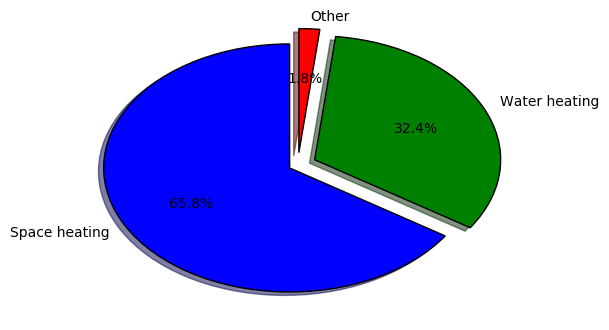

In [108]:
x1=pd.read_excel('/Users/apple/Desktop/data driven/project/dataset/oil4.xls')
explode = (0.05, 0.1, 0.1)
labels = x1.columns
x1=np.array(x1)
plt.pie(x1[0],explode=explode,labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

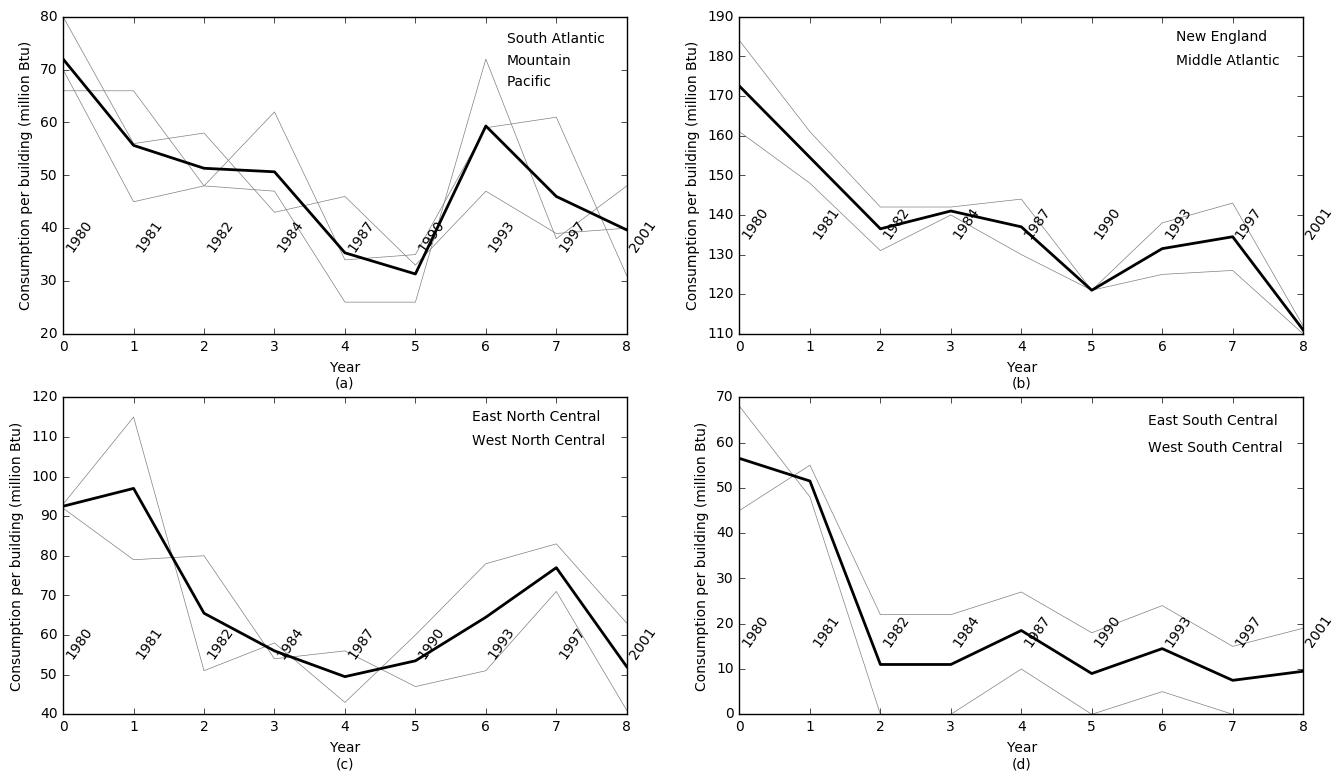

In [182]:
oil=pd.read_excel('/Users/apple/Desktop/data driven/project/dataset/oil.xls')
oil=oil.drop(oil.columns[[1]],axis=1)
oil=oil.drop(oil.columns[[1]],axis=1)
oil=oil.drop(oil.columns[[0]],axis=1)
oil=oil.dropna()
oil=oil.T
oilindex=oil.index
A=np.array(oil.dropna())
kmeans = KMeans(n_clusters=4, random_state=0).fit(A)
c=kmeans.labels_
a=kmeans.cluster_centers_
plt.figure(figsize=(16,9))
k1=0
k2=0
for i in range(len(A)):
    if c[i]==0:
        k1=k1+1
        plt.subplot(2,2,1)
        plt.plot(A[i],linewidth=0.5,color='grey')
        plt.text(6.3,87-k1*4,oilindex[i],fontsize=10)
    if c[i]==1:
        k2=k2+1
        plt.subplot(2,2,2)
        plt.plot(A[i],linewidth=0.5,color='grey')
        plt.text(6.2,190-k2*6,oilindex[i],fontsize=10)
    if c[i]==2:
        k1=k1+1
        plt.subplot(2,2,3)
        plt.plot(A[i],linewidth=0.5,color='grey')
        plt.text(5.8,120-k1*6,oilindex[i],fontsize=10)
    if c[i]==3:
        k2=k2+1
        plt.subplot(2,2,4)
        plt.plot(A[i],linewidth=0.5,color='grey')
        plt.text(5.8,82-k2*6,oilindex[i],fontsize=10)
text=oil.columns
for i in range(4):
    if i==0:
        plt.subplot(2,2,1)
        plt.plot(a[i],linewidth=2,color='black')
        plt.xlabel('Year''\n'
                   '(a)')
        plt.ylabel('Consumption per building (million Btu)')
#         plt.title('Census Region and Division(k=4) i=1')
        for j in range(len(text)):
            plt.text(j, 40, text[j], fontsize=10,rotation=55)
    if i==1:
        plt.subplot(2,2,2)
        plt.plot(a[i],linewidth=2,color='black')
        plt.xlabel('Year''\n'
                   '(b)')
        plt.ylabel('Consumption per building (million Btu)')
#         plt.title('Census Region and Division(k=4) i=2')
        for j in range(len(text)):
            plt.text(j, 140, text[j], fontsize=10,rotation=55)
    if i==2:
        plt.subplot(2,2,3)
        plt.plot(a[i],linewidth=2,color='black')
        plt.xlabel('Year''\n'
                   '(c)')
        plt.ylabel('Consumption per building (million Btu)')
#         plt.title('Census Region and Division(k=4) i=3')
        for j in range(len(text)):
            plt.text(j, 60, text[j], fontsize=10,rotation=55)
    if i==3:
        plt.subplot(2,2,4)
        plt.plot(a[i],linewidth=2,color='black')
        plt.xlabel('Year''\n'
                   '(d)')
        plt.ylabel('Consumption per building (million Btu)')
#         plt.title('Census Region and Division(k=4) i=4')
        for j in range(len(text)):
            plt.text(j, 20, text[j], fontsize=10,rotation=55)

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:20: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


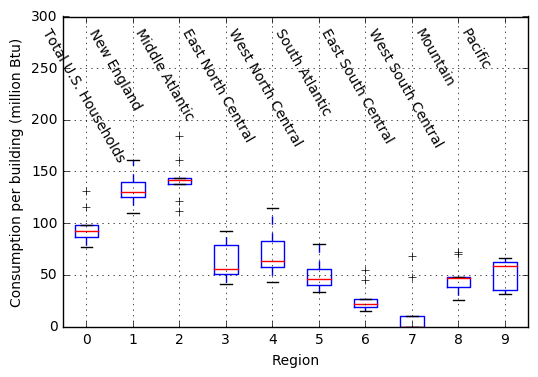

In [216]:
# A1=pd.DataFrame(A)
# # A1=A1.T
# A1.boxplot()
# for j in range(len(text)):
#         plt.text(j, 280, text[j], fontsize=10,rotation=-60)
# plt.ylim([0,300])
# plt.xlabel('Region')
# plt.ylabel('Consumption per building (million Btu)')
# # plt.title('Census Region and Division')


%matplotlib inline
oil=pd.read_excel('/Users/apple/Desktop/data driven/project/dataset/oil.xls')
oil=oil.drop(oil.columns[[1]],axis=1)
oil=oil.drop(oil.columns[[1]],axis=1)
oilindex=oil.index
A=np.array(oil.dropna())
A1=pd.DataFrame(A)
# A1=A1.T
A1.boxplot()
text=oil.columns
for j in range(len(text)):
        plt.text(j, 280, text[j], fontsize=10,rotation=-60)
plt.ylim([0,300])
plt.xlabel('Region')
plt.ylabel('Consumption per building (million Btu)')
# plt.title('Census Region and Division')

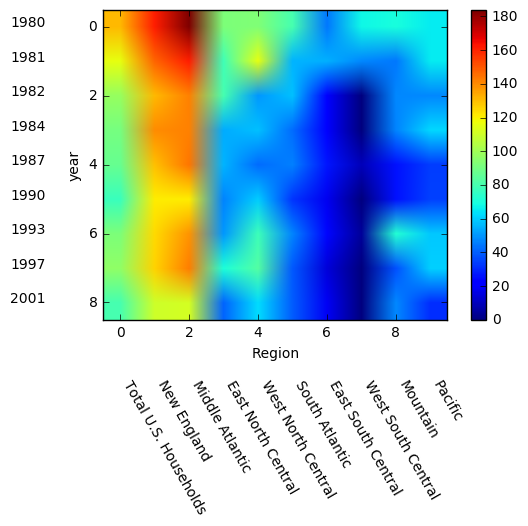

In [214]:
plt.imshow(A)
plt.colorbar()
for j in range(len(text)):
        plt.text(j, 10.5, text[j], fontsize=10,rotation=-60)
for j in range(len(oilindex)):
        plt.text(-3.2, j, oilindex[j], fontsize=10)
plt.xlabel('Region')
plt.ylabel('year')
# plt.title('Census Region and Division')